In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

600

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2c591c031d448c1a02bbc18f3bf8fa57


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [10]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1 
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | carnarvon
Processing Record 2 of Set 1 | ilanskiy
Processing Record 3 of Set 1 | mandurah
Processing Record 4 of Set 1 | vaini
Processing Record 5 of Set 1 | parabel
Processing Record 6 of Set 1 | jamestown
Processing Record 7 of Set 1 | tiksi
Processing Record 8 of Set 1 | rio grande
Processing Record 9 of Set 1 | butaritari
Processing Record 10 of Set 1 | iqaluit
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | linfen
Processing Record 13 of Set 1 | chaplynka
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 16 of Set 1 | clyde river
Processing Record 17 of Set 1 | esperance
Processing Record 18 of Set 1 | hobart
Processing Record 19 of Set 1 | cabo san lucas
Processing Record 20 of Set 1 | ribeira grande
Processing Record 21 of Set 1 | xingyi
Processing Record 22 of Set 1 | puerto ayora
Processing Record 23 of Set 1 | barcelona
Processing Record

Processing Record 42 of Set 4 | chernyshevskiy
Processing Record 43 of Set 4 | lavrentiya
Processing Record 44 of Set 4 | wajir
Processing Record 45 of Set 4 | lithakia
Processing Record 46 of Set 4 | necochea
Processing Record 47 of Set 4 | barcelos
Processing Record 48 of Set 4 | batticaloa
Processing Record 49 of Set 4 | kuytun
Processing Record 50 of Set 4 | port shepstone
Processing Record 1 of Set 5 | varzob
Processing Record 2 of Set 5 | taian
Processing Record 3 of Set 5 | katsuura
Processing Record 4 of Set 5 | saint-leu
Processing Record 5 of Set 5 | oistins
Processing Record 6 of Set 5 | barentsburg
City not found. Skipping...
Processing Record 7 of Set 5 | tuatapere
Processing Record 8 of Set 5 | methoni
Processing Record 9 of Set 5 | novyy urgal
Processing Record 10 of Set 5 | choma
Processing Record 11 of Set 5 | toliary
City not found. Skipping...
Processing Record 12 of Set 5 | salima
Processing Record 13 of Set 5 | anandnagar
Processing Record 14 of Set 5 | nelson bay


Processing Record 30 of Set 8 | recco
Processing Record 31 of Set 8 | tura
Processing Record 32 of Set 8 | marcona
City not found. Skipping...
Processing Record 33 of Set 8 | gimli
Processing Record 34 of Set 8 | aswan
Processing Record 35 of Set 8 | zarand
Processing Record 36 of Set 8 | mkushi
Processing Record 37 of Set 8 | hofn
Processing Record 38 of Set 8 | suntar
Processing Record 39 of Set 8 | yining
Processing Record 40 of Set 8 | naze
Processing Record 41 of Set 8 | boden
Processing Record 42 of Set 8 | makakilo city
Processing Record 43 of Set 8 | kamina
Processing Record 44 of Set 8 | mnogovershinnyy
Processing Record 45 of Set 8 | san ramon
Processing Record 46 of Set 8 | tiznit
Processing Record 47 of Set 8 | ostersund
Processing Record 48 of Set 8 | pochutla
Processing Record 49 of Set 8 | tshikapa
Processing Record 50 of Set 8 | toamasina
Processing Record 1 of Set 9 | ulagan
Processing Record 2 of Set 9 | salalah
Processing Record 3 of Set 9 | pariquera-acu
City not fo

Processing Record 18 of Set 12 | muli
Processing Record 19 of Set 12 | bilibino
Processing Record 20 of Set 12 | marsh harbour
Processing Record 21 of Set 12 | saryagash
Processing Record 22 of Set 12 | addis abeba
Processing Record 23 of Set 12 | quelimane
Processing Record 24 of Set 12 | thio
Processing Record 25 of Set 12 | encruzilhada
Processing Record 26 of Set 12 | golden
Processing Record 27 of Set 12 | shumskiy
Processing Record 28 of Set 12 | chuchkovo
Processing Record 29 of Set 12 | beihai
Processing Record 30 of Set 12 | cooma
Processing Record 31 of Set 12 | beringovskiy
Processing Record 32 of Set 12 | aksu
Processing Record 33 of Set 12 | nchelenge
Processing Record 34 of Set 12 | polewali
Processing Record 35 of Set 12 | port hedland
Processing Record 36 of Set 12 | port lincoln
Processing Record 37 of Set 12 | bandarbeyla
Processing Record 38 of Set 12 | camana
Processing Record 39 of Set 12 | nizhniy kuranakh
Processing Record 40 of Set 12 | terney
Processing Record 

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Carnarvon,-24.8667,113.6333,75.20,88,99,12.66,AU,2021-04-05 17:31:14
1,Ilanskiy,56.2358,96.0650,29.80,96,100,1.99,RU,2021-04-05 17:31:14
2,Mandurah,-32.5500,115.7000,64.99,79,2,4.07,AU,2021-04-05 17:31:15
3,Vaini,-21.2000,-175.2000,64.40,100,20,2.30,TO,2021-04-05 17:27:24
4,Parabel,58.6978,81.4825,34.75,88,100,12.64,RU,2021-04-05 17:31:15
5,Jamestown,42.0970,-79.2353,61.00,26,1,4.61,US,2021-04-05 17:29:37
6,Tiksi,71.6872,128.8694,-18.96,99,44,3.78,RU,2021-04-05 17:29:26
7,Rio Grande,-32.0350,-52.0986,80.60,65,40,16.11,BR,2021-04-05 17:31:16
8,Butaritari,3.0707,172.7902,81.90,78,97,12.01,KI,2021-04-05 17:27:18
9,Iqaluit,63.7506,-68.5145,15.80,79,75,21.85,CA,2021-04-05 17:29:25


In [12]:
city_data_df = city_data_df[['City','Country','Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']]

city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Carnarvon,AU,2021-04-05 17:31:14,-24.8667,113.6333,75.20,88,99,12.66
1,Ilanskiy,RU,2021-04-05 17:31:14,56.2358,96.0650,29.80,96,100,1.99
2,Mandurah,AU,2021-04-05 17:31:15,-32.5500,115.7000,64.99,79,2,4.07
3,Vaini,TO,2021-04-05 17:27:24,-21.2000,-175.2000,64.40,100,20,2.30
4,Parabel,RU,2021-04-05 17:31:15,58.6978,81.4825,34.75,88,100,12.64
5,Jamestown,US,2021-04-05 17:29:37,42.0970,-79.2353,61.00,26,1,4.61
6,Tiksi,RU,2021-04-05 17:29:26,71.6872,128.8694,-18.96,99,44,3.78
7,Rio Grande,BR,2021-04-05 17:31:16,-32.0350,-52.0986,80.60,65,40,16.11
8,Butaritari,KI,2021-04-05 17:27:18,3.0707,172.7902,81.90,78,97,12.01
9,Iqaluit,CA,2021-04-05 17:29:25,63.7506,-68.5145,15.80,79,75,21.85


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

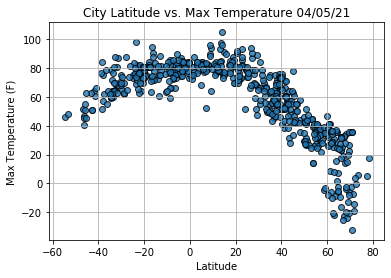

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

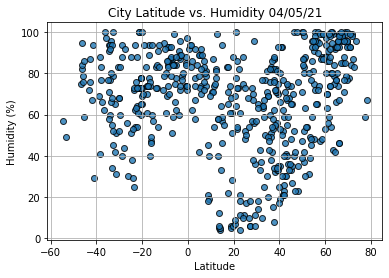

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

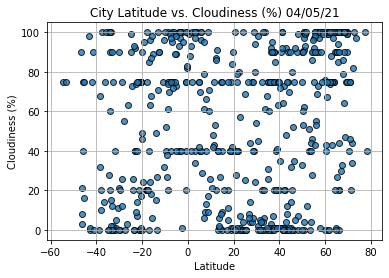

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

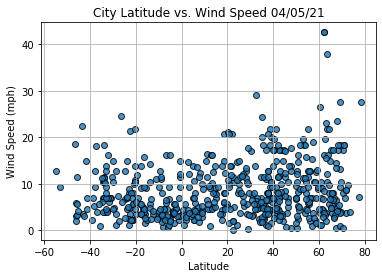

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [19]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [20]:
index13 = city_data_df.loc[13]
index13

City                 Punta Arenas
Country                        CL
Date          2021-04-05 17:31:17
Lat                        -53.15
Lng                      -70.9167
Max Temp                     48.2
Humidity                       49
Cloudiness                     75
Wind Speed                   9.22
Name: 13, dtype: object

In [21]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Ilanskiy,RU,2021-04-05 17:31:14,56.2358,96.0650,29.80,96,100,1.99
4,Parabel,RU,2021-04-05 17:31:15,58.6978,81.4825,34.75,88,100,12.64
5,Jamestown,US,2021-04-05 17:29:37,42.0970,-79.2353,61.00,26,1,4.61
6,Tiksi,RU,2021-04-05 17:29:26,71.6872,128.8694,-18.96,99,44,3.78
8,Butaritari,KI,2021-04-05 17:27:18,3.0707,172.7902,81.90,78,97,12.01


In [22]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

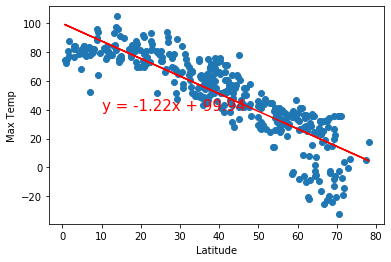

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

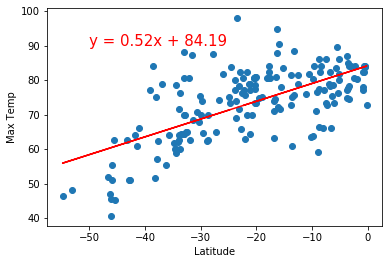

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

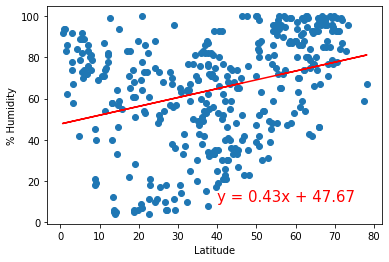

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

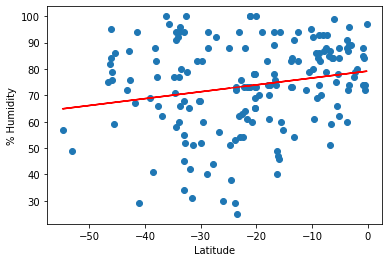

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

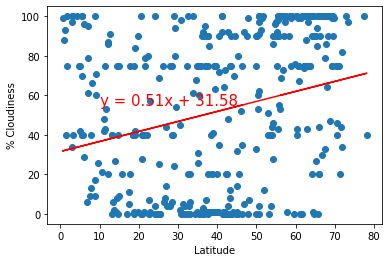

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values,
                   'Linear Regression on the Northern Hemisphere \
                    for % Cloudiness', '% Cloudiness',(10,55))